#### In this notebook, a simple feed forward network is trained directly on the pairwise distance feature space to predict energies.

#### Import some required libraries

In [5]:

## Standard libraries
import numpy as np
import pandas as pd
import os
import pickle

## For some analysis
import MDAnalysis as mda
from MDAnalysis.analysis import distances

## For plotting
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib.gridspec import GridSpec

## For visualization
import nglview as nv

## For some data pre-processing
import sklearn.preprocessing as preprocessing
from sklearn.decomposition import PCA, KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score

## For neural network training
import torch
import torch.nn as nn
import torch.optim as optim


#### Global matplot font settings

In [6]:
showPlots=1
useMagics=1
if useMagics:
    %matplotlib inline
    #%matplotlib notebook
    %load_ext autoreload
    %autoreload 2
    %reload_ext autoreload
    
font = {'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Read scalers, train and test data.

#### read scalers

In [7]:
# Save the scaler to a file
with open('./data/x_minmax_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
with open('./data/y_minmax_scaler.pkl', 'rb') as f:
    y_scaler = pickle.load(f)

#### read x and y

In [26]:

# Save features to memory
pca_train_test_file = './data/x_features_y_labels.npy'
with open(pca_train_test_file, 'rb') as f:
    data = pickle.load(f)
        
X_train = data['X_train']
X_test = data['X_test']
X_train_pca = data['pca_X_train']
X_test_pca = data['pca_X_test']
y_train = data['y_train'].values.reshape(-1,1)
y_test = data['y_test'].values.reshape(-1,1)



#### Convert data to tensors

In [12]:
#### Train a NN model

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([4876, 171]),
 torch.Size([1219, 171]),
 torch.Size([4876, 1]),
 torch.Size([1219, 1]))

#### Train a simple feed forward neural network model to predict energies using pairwise distance features

Epoch [1/5000], Train Loss: 0.0875, Test Loss: 0.0828
Epoch [11/5000], Train Loss: 0.0495, Test Loss: 0.0489
Epoch [21/5000], Train Loss: 0.0415, Test Loss: 0.0436
Epoch [31/5000], Train Loss: 0.0373, Test Loss: 0.0399
Epoch [41/5000], Train Loss: 0.0346, Test Loss: 0.0373
Epoch [51/5000], Train Loss: 0.0309, Test Loss: 0.0361
Epoch [61/5000], Train Loss: 0.0297, Test Loss: 0.0347
Epoch [71/5000], Train Loss: 0.0283, Test Loss: 0.0357
Epoch [81/5000], Train Loss: 0.0244, Test Loss: 0.0332
Epoch [91/5000], Train Loss: 0.0235, Test Loss: 0.0321
Epoch [101/5000], Train Loss: 0.0265, Test Loss: 0.0328
Epoch [111/5000], Train Loss: 0.0228, Test Loss: 0.0307
Epoch [121/5000], Train Loss: 0.0207, Test Loss: 0.0312
Epoch [131/5000], Train Loss: 0.0233, Test Loss: 0.0310
Epoch [141/5000], Train Loss: 0.0218, Test Loss: 0.0336
Epoch [151/5000], Train Loss: 0.0222, Test Loss: 0.0321
Epoch [161/5000], Train Loss: 0.0210, Test Loss: 0.0326
Epoch [171/5000], Train Loss: 0.0216, Test Loss: 0.0330
Epo

Epoch [1461/5000], Train Loss: 0.0117, Test Loss: 0.0327
Epoch [1471/5000], Train Loss: 0.0111, Test Loss: 0.0361
Epoch [1481/5000], Train Loss: 0.0111, Test Loss: 0.0320
Epoch [1491/5000], Train Loss: 0.0103, Test Loss: 0.0336
Epoch [1501/5000], Train Loss: 0.0105, Test Loss: 0.0355
Epoch [1511/5000], Train Loss: 0.0099, Test Loss: 0.0348
Epoch [1521/5000], Train Loss: 0.0102, Test Loss: 0.0342
Epoch [1531/5000], Train Loss: 0.0104, Test Loss: 0.0333
Epoch [1541/5000], Train Loss: 0.0104, Test Loss: 0.0335
Epoch [1551/5000], Train Loss: 0.0096, Test Loss: 0.0337
Epoch [1561/5000], Train Loss: 0.0104, Test Loss: 0.0326
Epoch [1571/5000], Train Loss: 0.0099, Test Loss: 0.0332
Epoch [1581/5000], Train Loss: 0.0120, Test Loss: 0.0352
Epoch [1591/5000], Train Loss: 0.0121, Test Loss: 0.0330
Epoch [1601/5000], Train Loss: 0.0115, Test Loss: 0.0315
Epoch [1611/5000], Train Loss: 0.0106, Test Loss: 0.0319
Epoch [1621/5000], Train Loss: 0.0102, Test Loss: 0.0334
Epoch [1631/5000], Train Loss: 

Epoch [2911/5000], Train Loss: 0.0101, Test Loss: 0.0326
Epoch [2921/5000], Train Loss: 0.0081, Test Loss: 0.0347
Epoch [2931/5000], Train Loss: 0.0082, Test Loss: 0.0342
Epoch [2941/5000], Train Loss: 0.0087, Test Loss: 0.0360
Epoch [2951/5000], Train Loss: 0.0118, Test Loss: 0.0370
Epoch [2961/5000], Train Loss: 0.0087, Test Loss: 0.0336
Epoch [2971/5000], Train Loss: 0.0087, Test Loss: 0.0342
Epoch [2981/5000], Train Loss: 0.0098, Test Loss: 0.0339
Epoch [2991/5000], Train Loss: 0.0093, Test Loss: 0.0351
Epoch [3001/5000], Train Loss: 0.0096, Test Loss: 0.0343
Epoch [3011/5000], Train Loss: 0.0096, Test Loss: 0.0338
Epoch [3021/5000], Train Loss: 0.0087, Test Loss: 0.0352
Epoch [3031/5000], Train Loss: 0.0087, Test Loss: 0.0354
Epoch [3041/5000], Train Loss: 0.0101, Test Loss: 0.0344
Epoch [3051/5000], Train Loss: 0.0089, Test Loss: 0.0353
Epoch [3061/5000], Train Loss: 0.0096, Test Loss: 0.0357
Epoch [3071/5000], Train Loss: 0.0110, Test Loss: 0.0342
Epoch [3081/5000], Train Loss: 

Epoch [4351/5000], Train Loss: 0.0087, Test Loss: 0.0346
Epoch [4361/5000], Train Loss: 0.0094, Test Loss: 0.0358
Epoch [4371/5000], Train Loss: 0.0084, Test Loss: 0.0362
Epoch [4381/5000], Train Loss: 0.0089, Test Loss: 0.0341
Epoch [4391/5000], Train Loss: 0.0093, Test Loss: 0.0355
Epoch [4401/5000], Train Loss: 0.0084, Test Loss: 0.0347
Epoch [4411/5000], Train Loss: 0.0085, Test Loss: 0.0365
Epoch [4421/5000], Train Loss: 0.0089, Test Loss: 0.0389
Epoch [4431/5000], Train Loss: 0.0093, Test Loss: 0.0393
Epoch [4441/5000], Train Loss: 0.0084, Test Loss: 0.0367
Epoch [4451/5000], Train Loss: 0.0092, Test Loss: 0.0374
Epoch [4461/5000], Train Loss: 0.0097, Test Loss: 0.0370
Epoch [4471/5000], Train Loss: 0.0084, Test Loss: 0.0361
Epoch [4481/5000], Train Loss: 0.0085, Test Loss: 0.0390
Epoch [4491/5000], Train Loss: 0.0089, Test Loss: 0.0381
Epoch [4501/5000], Train Loss: 0.0091, Test Loss: 0.0375
Epoch [4511/5000], Train Loss: 0.0089, Test Loss: 0.0351
Epoch [4521/5000], Train Loss: 

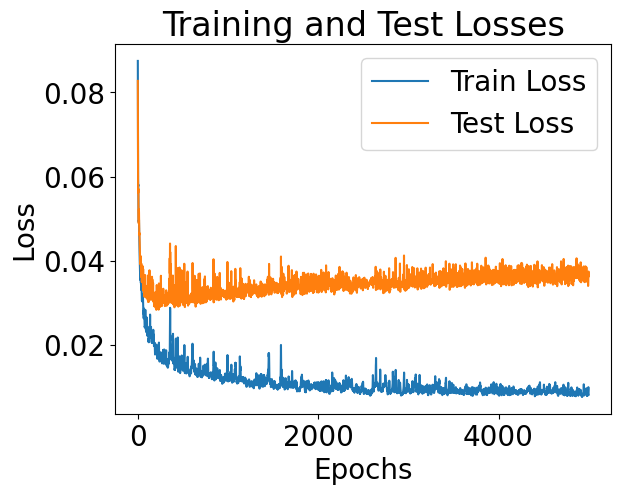

In [15]:
# Define the feedforward neural network
class FeedForwardNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        
        super(FeedForwardNN, self).__init__()
        
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
            
        layers.append(nn.Linear(hidden_size, output_size))
        
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)
    
    
#### Set parameters
num_samples = y_train.shape[0]
input_size = X_train.shape[-1]
output_size = 1
hidden_size = 25 #model complexity. increase this or num_layers to overfit.
num_layers = 3
batch_size = 500
num_epochs = 5000
learning_rate = 0.01
weight_decay = 0.0001

# For early stopping parameters (not used)
patience = 200
best_val_loss = float('inf')
counter = 0


# Define the model, loss function, and optimizer
model = FeedForwardNN(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)#, weight_decay=weight_decay)

# Training loop
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    
    # Train the model
    model.train()
    train_loss = 0.0
    
    for i in range(0, len(X_train), batch_size):
        
        optimizer.zero_grad()
        
        #print(X_train[i:i+batch_size].shape)
        outputs = model(X_train[i:i+batch_size])
        
        #print(outputs, y_train[i:i+batch_size])
        loss = criterion(outputs, y_train[i:i+batch_size])
        
        loss.backward()
        
        optimizer.step()
        train_loss += loss.item() * batch_size / len(X_train)
        
    train_losses.append(train_loss)

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test), y_test).item()
    test_losses.append(test_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
                
#     # Early stopping
#     if test_loss < best_val_loss:
#         best_val_loss = test_loss
#         counter = 0
#     else:
#         counter += 1
#         if counter >= patience:
#             print("Early stopping triggered.")
#             break

# Plotting the losses
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()


In [18]:
# Evaluate the model on the train set
with torch.no_grad():
    model.eval()
    nn_train_predictions = model(X_train).numpy()

# Evaluate the model on the test set
with torch.no_grad():
    nn_test_predictions = model(X_test).numpy()
    
    
print(f"Linear MSE: Train:{mean_squared_error(y_train, nn_train_predictions)}, Test:{mean_squared_error(y_test, nn_test_predictions)}")
train_r2=r2_score(y_train, nn_train_predictions)
test_r2=r2_score(y_test, nn_test_predictions)
print(f"Linear R2: Train:{train_r2}, Test:{test_r2}")


Linear MSE: Train:0.008848358877003193, Test:0.036350950598716736
Linear R2: Train:0.8900899397510683, Test:0.5689977049862509


#### Visualize the results

#### Parity plot of ground truth and predictions in train and test 

Text(0, 0.5, 'Predicted (eV)')

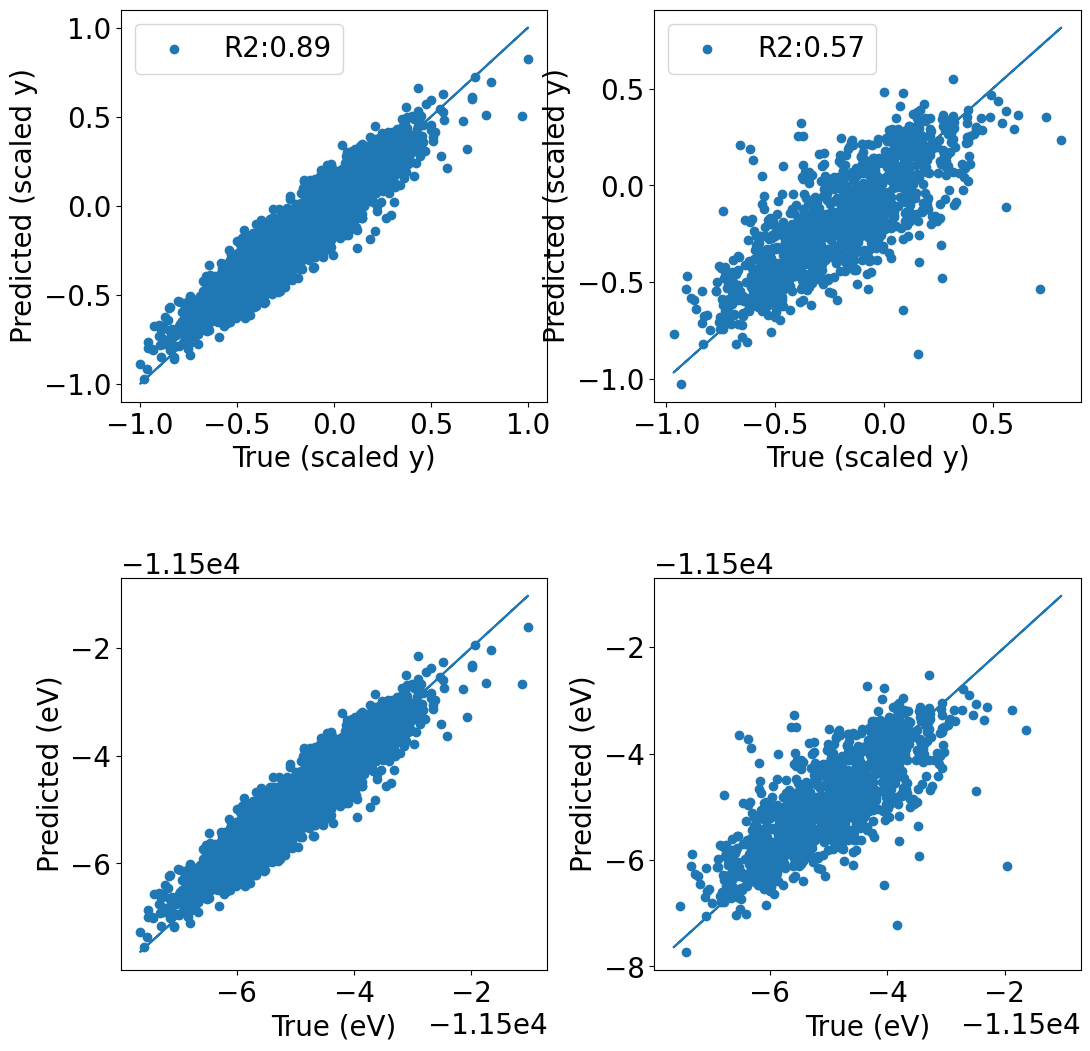

In [22]:
# Set the figure size
fig = plt.figure(figsize=(12, 12))

# Adjust spacing
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.25, hspace=0.45)

nrows=2
ncols=2

# Create a 3x3 grid
grid = GridSpec(nrows, ncols)

ax = plt.subplot(grid[0,0])

ax.scatter(y_train, nn_train_predictions, label=f'R2:{np.round(train_r2,2)}')
ax.plot(y_train, y_train)

ax.set_xlabel('True (scaled y)')
ax.set_ylabel('Predicted (scaled y)')
ax.legend()

ax = plt.subplot(grid[0,1])

ax.scatter(y_test, nn_test_predictions,label=f'R2:{np.round(test_r2,2)}')
ax.plot(y_test, y_test)

ax.set_xlabel('True (scaled y)')
ax.set_ylabel('Predicted (scaled y)')
ax.legend()



ax = plt.subplot(grid[1,0])

ax.scatter(y_scaler.inverse_transform(y_train.reshape(-1,1)), 
           y_scaler.inverse_transform(nn_train_predictions.reshape(-1,1)))
ax.plot(y_scaler.inverse_transform(y_train.reshape(-1,1)), 
        y_scaler.inverse_transform(y_train.reshape(-1,1)))

ax.set_xlabel('True (eV)')
ax.set_ylabel('Predicted (eV)')

ax = plt.subplot(grid[1,1])

ax.scatter(y_scaler.inverse_transform(y_test.reshape(-1,1)), 
           y_scaler.inverse_transform(nn_test_predictions.reshape(-1,1)))
ax.plot(y_scaler.inverse_transform(y_train.reshape(-1,1)), 
        y_scaler.inverse_transform(y_train.reshape(-1,1)))

ax.set_xlabel('True (eV)')
ax.set_ylabel('Predicted (eV)')




#### true values and predicted values against each dimension [scaled values; can be inverted easily]

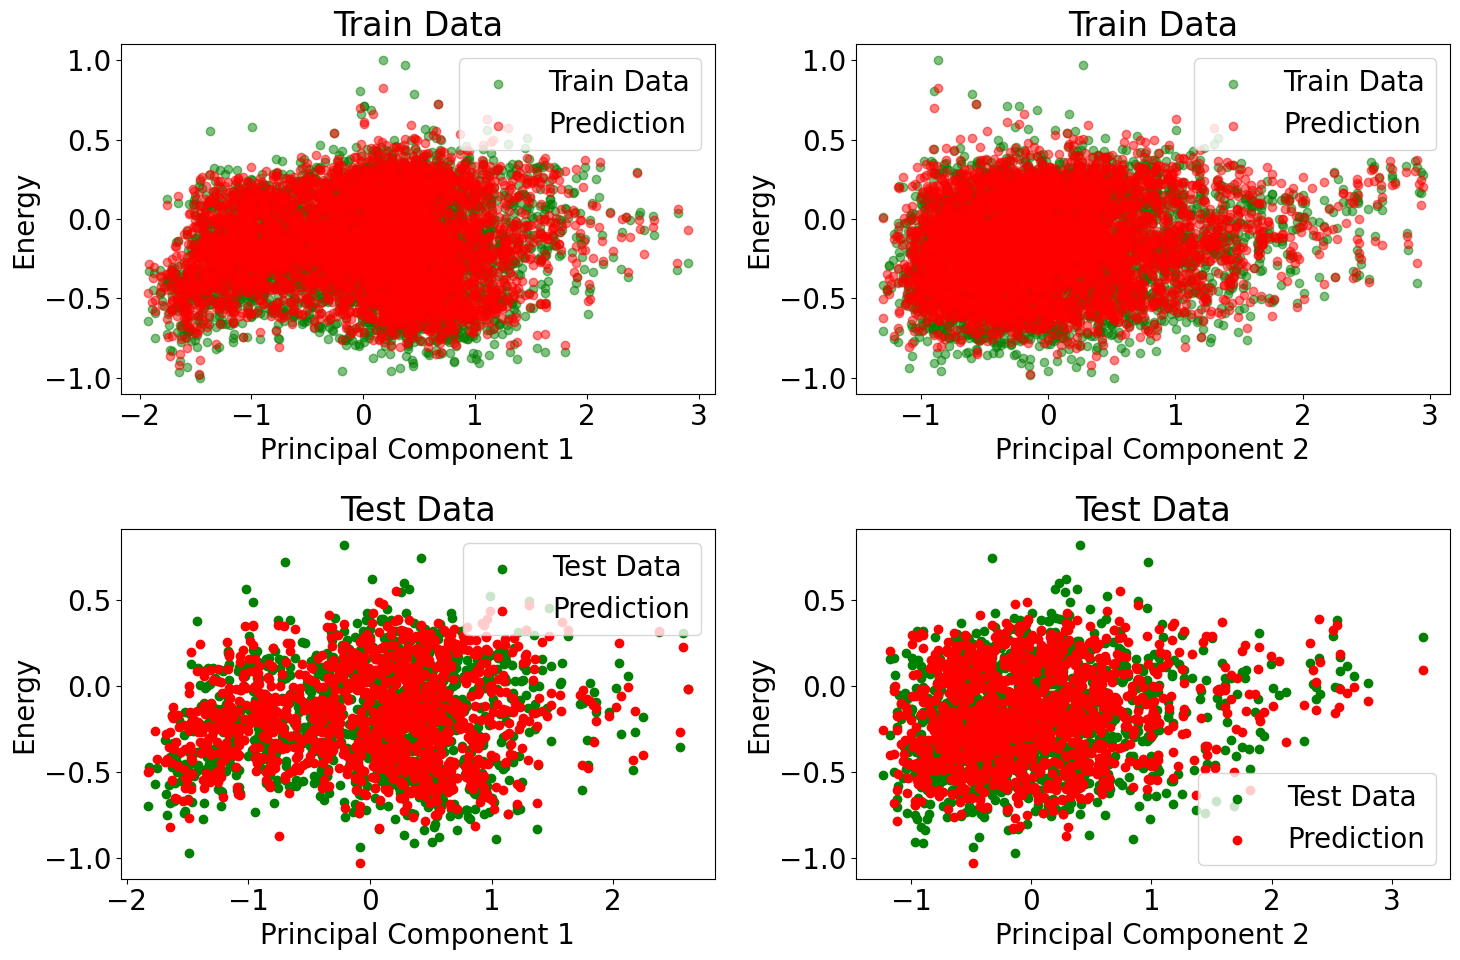

In [29]:

# Plot y values against each principal component for both train and test data
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(2):
    # Train data
    axs[0, i].scatter(X_train_pca.values[:, i], y_train, color='green', label='Train Data', alpha=0.5)
    axs[0, i].scatter(X_train_pca.values[:, i], nn_train_predictions, color='red', label='Prediction', alpha=0.5)
    
    axs[0, i].set_xlabel(f'Principal Component {i+1}')
    axs[0, i].set_ylabel('Energy')
    axs[0, i].set_title('Train Data')
    
    axs[0, i].legend()

    # Test data
    axs[1, i].scatter(X_test_pca.values[:, i], y_test, color='green', label='Test Data')
    axs[1, i].scatter(X_test_pca.values[:, i], nn_test_predictions, color='red', label='Prediction')
    
    axs[1, i].set_xlabel(f'Principal Component {i+1}')
    axs[1, i].set_ylabel('Energy')
    axs[1, i].set_title('Test Data')
    
    axs[1, i].legend()

plt.tight_layout()
plt.show()

#### true values and predicted values against two dimensions at a time [scaled values; can be inverted easily]

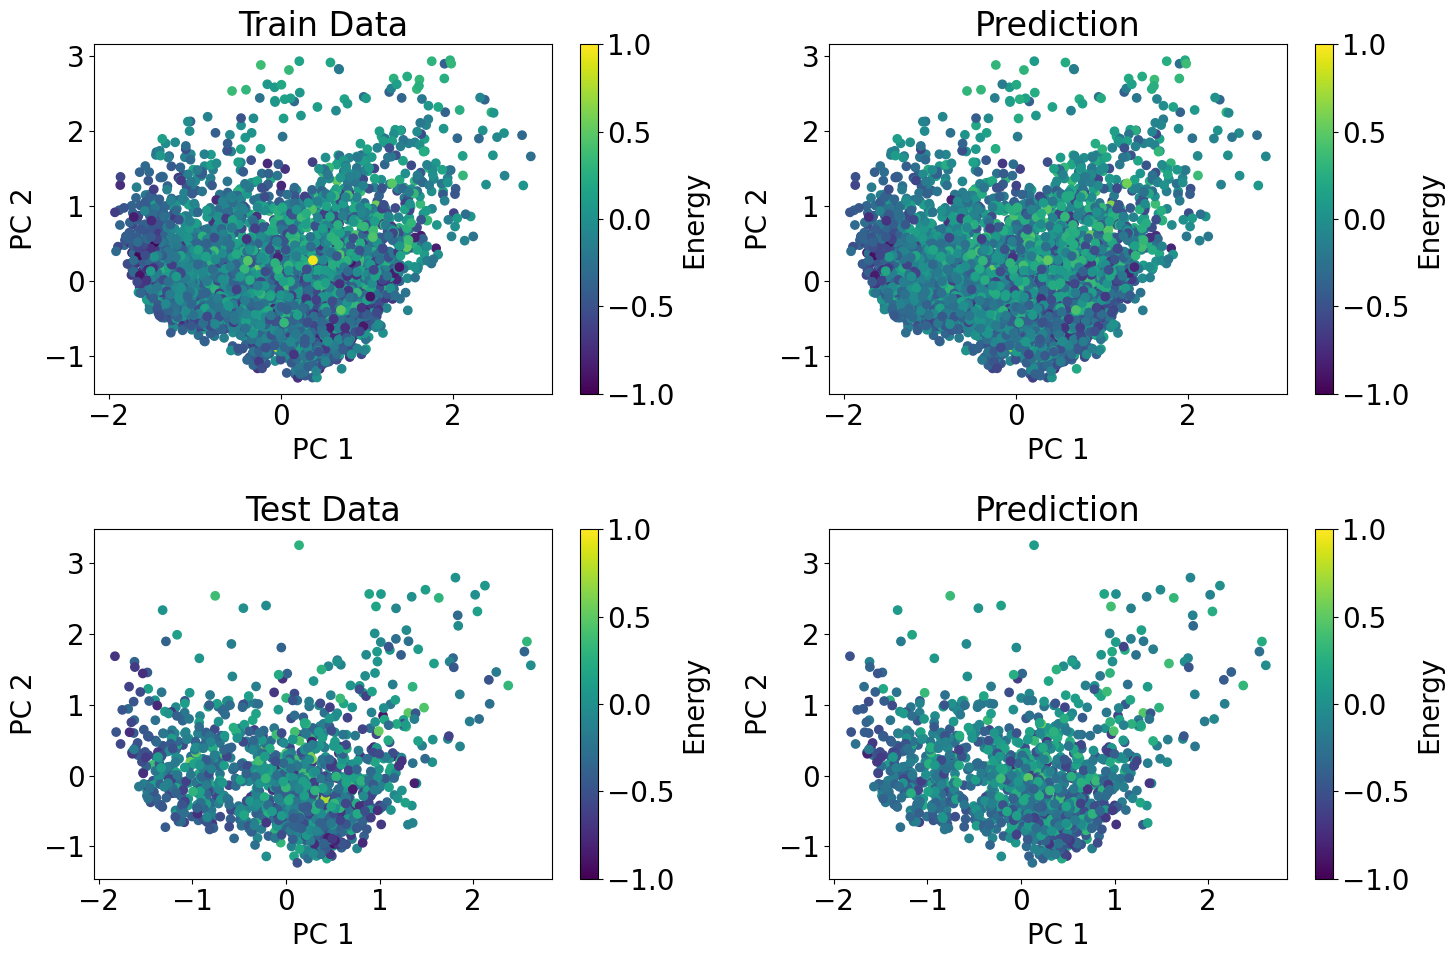

In [31]:

def plot_scatter_with_color(ax, x1, x2, y, title, vmin, vmax, select_pc1, select_pc2):
    scatter = ax.scatter(x1, x2, c=y, cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_xlabel('PC '+str(select_pc1+1))
    ax.set_ylabel('PC '+str(select_pc2+1))
    ax.set_title(title)
    #ax.legend()
    plt.colorbar(scatter, ax=ax, label='Energy')

# Create subplots for train and test data
fig, axs = plt.subplots(2, 2, figsize=(15, 10))


select_pc1 = 0
select_pc2 = 1

# Plot train data
plot_scatter_with_color(axs[0, 0], X_train_pca.values[:, select_pc1], X_train_pca.values[:, select_pc2], 
                        y_train, 'Train Data', y_train.min(), y_train.max(), select_pc1, select_pc2)
plot_scatter_with_color(axs[0, 1], X_train_pca.values[:, select_pc1], X_train_pca.values[:, select_pc2], 
                        nn_train_predictions, 'Prediction', y_train.min(), 
                        y_train.max(), select_pc1, select_pc2)




# Plot test data
plot_scatter_with_color(axs[1, 0], X_test_pca.values[:, select_pc1], X_test_pca.values[:, select_pc2], 
                        y_test, 'Test Data', 
                        y_train.min(), y_train.max(), select_pc1, select_pc2)
plot_scatter_with_color(axs[1, 1], X_test_pca.values[:, select_pc1], X_test_pca.values[:, select_pc2], 
                        nn_test_predictions, 'Prediction',
                        y_train.min(), y_train.max(), select_pc1, select_pc2)


    
plt.tight_layout()
plt.show()
